# A Computer Vision Example

[10개로 분류된 패션 이미지](https://github.com/zalandoresearch/fashion-mnist#labels)를 분류하는 딥러닝

## Start Coding


In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


Fashion MNIST 데이터는 tf.keras datasets API에 들어있다. 

In [2]:
mnist = tf.keras.datasets.fashion_mnist

트레이닝과 테스트셋 가져온다.

In [4]:
(X_train, y_train),( X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

이미지는 숫자로 되어있다. 0부터 255까지의 숫자로 되어있다. 

In [16]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [19]:
X_train[0, : ,: ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
import matplotlib.pyplot as plt


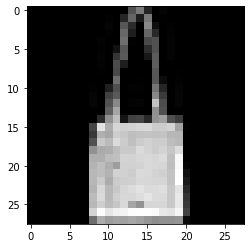

In [32]:
plt.imshow(  X_train[200] , cmap='gray'  )
plt.show()

In [33]:
y_train[200]

8

학습이 잘 되도록 0과 1사이의 값으로 노말라이징(normalizing) 한다.

In [36]:
X_train = X_train / 255.0

In [40]:
X_test = X_test / 255.0

이미지의 가로 세로를 전부 일렬로 만드는 작업이 flatten 이다.

모델을 만들어 보자.

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
from keras.layers import Flatten

**Sequential**: SEQUENCE layers 로 모델링

**Flatten**: 2차원, 3차원을 1차원으로 만드는것

**Dense**: 뉴런을 레이어에 붙인다.

각 레이어는 **activation function** 이 필요하다. 

**Relu**  액티베이션 함수 참고 https://docs.google.com/presentation/d/1DCOW7Lum2rnoPU7gxpznimrXV0DOJFc-YkkJt3jZC0U/edit#slide=id.ga8aac09587_0_2

**Softmax** 여러개의 값 중에서 가장 큰 값을 선택. [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 여기서 가장 큰 값을 1로 만들고 나머지는 0으로 만들어준다. [0,0,0,0,1,0,0,0,0] 


In [44]:
def build_model():
  model = Sequential()
  model.add( Flatten()  )
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [43]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 2개로 분류하는 문제에서의 로스 펑션은 binary_crossentropy 를 사용.
# 3개 이상으로 분류하는 문제에서는, 두가지 방법이 있는데,
# y의 값을 확인하여 선택하는 것이다.

# 첫번째 방법은, y값이 레이블 인코딩으로 되어있으면, sparse_categorical_crossentropy
# 두번째 방법은, y값이 원핫인코딩으로 되어있으면, categorical_crossentropy

optimizer and loss function 으로 컴파일 한 후에  **model.fit** 함수로 학습한다.. 

In [45]:
model = build_model()

In [46]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4907 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3701 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3338 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.8931


accuracy 가 약 90% 라는 뜻. 5 epochs 라 금방 끝났다.

학습에 사용하지 않는, 테스트 데이터를 통해서, 얼마나 정확도되 나오는지 확인해 본다.

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8713


[0.3528589904308319, 0.8712999820709229]

In [50]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [51]:
y_pred

array([[4.3751832e-05, 2.5012057e-05, 1.2728825e-04, ..., 4.7506530e-02,
        3.9543925e-04, 9.4138670e-01],
       [1.0048036e-04, 3.3359193e-09, 9.8149937e-01, ..., 6.9499288e-11,
        8.5064727e-07, 6.5018747e-11],
       [6.6974167e-07, 9.9999875e-01, 1.8277218e-07, ..., 3.8261281e-14,
        3.0951622e-10, 6.6021610e-14],
       ...,
       [2.3116032e-03, 2.6001887e-08, 1.7426421e-04, ..., 4.2918131e-08,
        9.9681288e-01, 9.9112463e-10],
       [1.9157085e-08, 9.9999458e-01, 1.8123039e-08, ..., 1.3532257e-10,
        1.2240828e-09, 2.3059046e-10],
       [2.6350210e-03, 5.3620661e-06, 6.7740381e-03, ..., 1.1186506e-01,
        3.3377800e-02, 2.4961453e-04]], dtype=float32)

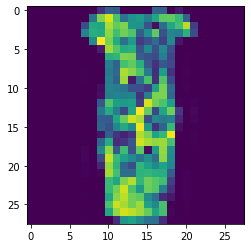

In [62]:
plt.imshow(X_test[100])
plt.show()

In [63]:
y_pred[100]

array([1.1923222e-02, 3.9326205e-04, 4.1238553e-04, 9.8428100e-01,
       9.0421978e-05, 1.0831004e-06, 2.8575098e-03, 2.7567415e-07,
       3.9886290e-05, 9.2914911e-07], dtype=float32)

In [65]:
y_pred[100].sum()

1.0

In [66]:
y_pred[100].argmax()

3

# Exploration Exercises

### Exercise 1:

테스트 이미지를 예측한 후, 첫번째 이미지에 대해서 예측한 결과를 출력한다. 

### 예측한 결과가 리스트로 나온다. 리스트는 무엇을 나타내는가 ?


   It's the probability that this item is each of the 10 classes


첫번째 이미지의 실제값을 출력한다.

### 이 예측결과가 앵클부츠인지는, 예측결과로 나온 리스트를 보고 어떻게 알 수 있는가?



10번째 값이 가장 크니까, 레이블은 0부터라, 9 이다.

## Exercise 2: 
히든레이어를 1024개의 뉴런으로 바꿔서 실행해보자 


### Question 1. 1024 개로 뉴런을 늘리면 어떤 일이 일어나는가?




## Exercise 3: 

Flatten() layer를 지우면 어떻게 되는가?



## Exercise 4: 

마지막 레이어를 10개가 아니라, 5개로 바꾸면 어떻게 되는가? 

## Exercise 5: 

히든레이어를 늘려본다. 512개, 256개, 10개로 레이어 구성을 해보자. 

성능이 개선되는가?

## Exercise 6: 

epochs 의 횟수를 조정해 보자. 


Try 30 epochs  





30 에포크를 했을때의 결과를 보면 어떠한 문제가 있다. 이러한 문제를 무엇이라고 하는가???

## Exercise 7: 

accuracy 나 loss 가, 우리가 원하는 특정 값이 되면 자동으로 학습을 멈추가 하고 싶다. 즉, 특정값에 도달하면 학습을 멈추게 할 수 있는 콜백기능을 제공한다. callbacks